In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [33]:
df=pd.read_csv("Uber Request Data.csv")
df.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,11/7/2016 11:51,11/7/2016 13:00
1,867,Airport,1.0,Trip Completed,11/7/2016 17:57,11/7/2016 18:47
2,1807,City,1.0,Trip Completed,12/7/2016 9:17,12/7/2016 9:58
3,2532,Airport,1.0,Trip Completed,12/7/2016 21:08,12/7/2016 22:03
4,3112,City,1.0,Trip Completed,13-07-2016 08:33:16,13-07-2016 09:25:47


In [34]:
df.describe()

,Request id,Driver id
count,6745.000000,4095.000000
mean,3384.644922,149.501343
std,1955.099667,86.051994
min,1.000000,1.000000
25%,1691.000000,75.000000
50%,3387.000000,149.000000
75%,5080.000000,224.000000
max,6766.000000,300.000000


In [35]:
df.isnull().sum()

Request id              0
Pickup point            0
Driver id            2650
Status                  0
Request timestamp       0
Drop timestamp       3914
dtype: int64

In [36]:
df["Request timestamp"]=pd.to_datetime(df["Request timestamp"])
df.dtypes

Request id                    int64
Pickup point                 object
Driver id                   float64
Status                       object
Request timestamp    datetime64[ns]
Drop timestamp               object
dtype: object

## from the given data we find the null values, In Drop timestamp attribute contians null values beacuse those who cancelled thier trip and no cars available at time of searching we can't get the data of drop time, we  get the data of request time
 


### you can observe from the below code

In [37]:
df.loc[(df["Status"]).isin(["Cancelled","No Cars Available"])].isnull().sum()

Request id              0
Pickup point            0
Driver id            2650
Status                  0
Request timestamp       0
Drop timestamp       3914
dtype: int64

 # 1.Visually identify the most pressing problems for Uber

   ## 1.1                                                          AIRPORT TO CITY

### 1.1.1 from the given data first we can working on how frequency is distributed based on their status from airport to city 

In [38]:
print("Status from Airport")
A=df[df["Pickup point"]=="Airport"].groupby(df["Status"]).count()
A.iloc[:,1]


Status from Airport


Status
Cancelled             198
No Cars Available    1713
Trip Completed       1327
Name: Pickup point, dtype: int64

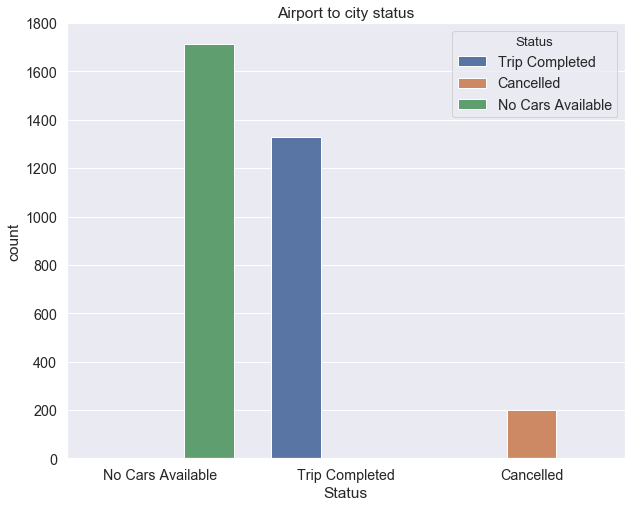

In [39]:
sns.set(font_scale=(1.3))
plt.figure(figsize=(10,8))
plt.title("Airport to city status")
ax=sns.countplot(x="Status",hue="Status",data=df[df["Pickup point"]=="Airport"],
              order=df[df["Pickup point"]=="Airport"]["Status"].value_counts().index)

plt.show()

### below i have add one more new column that is weekday, purpose on which day we are going to get more requests 

In [40]:
df["weekday"]=df["Request timestamp"].dt.day_name()

In [41]:
df.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,weekday
0,619,Airport,1.0,Trip Completed,2016-11-07 11:51:00,11/7/2016 13:00,Monday
1,867,Airport,1.0,Trip Completed,2016-11-07 17:57:00,11/7/2016 18:47,Monday
2,1807,City,1.0,Trip Completed,2016-12-07 09:17:00,12/7/2016 9:58,Wednesday
3,2532,Airport,1.0,Trip Completed,2016-12-07 21:08:00,12/7/2016 22:03,Wednesday
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,13-07-2016 09:25:47,Wednesday


### 1.1.2 from the available data thier no alteast one single request on saturday and sunday these two days are holidays to enjoy weekends for every job holder,students

### one more thing you can notice we are getting more requests on wednesday(double the count)  as compare to  remaing weekdays(mon,fri,thur)

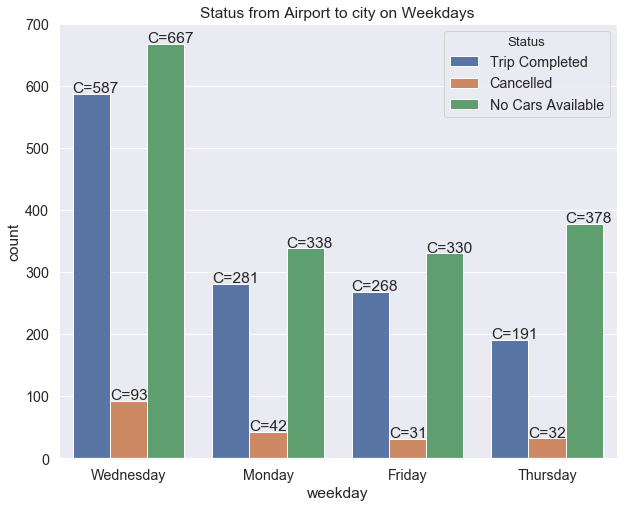

In [42]:
sns.set(font_scale=(1.3))
plt.figure(figsize=(10,8))
plt.title("Status from Airport to city on Weekdays")
ax=sns.countplot(x="weekday",hue="Status",data=df[df["Pickup point"]=="Airport"],
              order=df[df["Pickup point"]=="Airport"]["weekday"].value_counts().index)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+0, height+ 2.5, 'C=%.0f'%(height))

### from the above graph you can clearly observer everyday we can see the problem of no cars available which shows the count high

### from the above visualization we find which one is the most problem requests from the airport to city 

### now we need to know at what time we are getting more requests

### 1.1.3 for the same i am going to add two new columns 1."Time" 2."Time Slot" for time seires analysis.

In [43]:

df["Time"]=df["Request timestamp"].dt.time
l=[]

for i in df["Request timestamp"].dt.hour.values:
    if i>=0 and i <=5:
            l.append("Late Night")
    elif i>5 and i<=8:
        l.append("Early Morning")
    elif i>=8 and i<12:
        l.append("Morning")
    elif i>=12 and i<17:
        l.append("After Noon")
    else:
        l.append("Evening or Night")
df["Time Slots"]=l        

Airport=df[df["Pickup point"]=="Airport"]

In [44]:
Airport.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,weekday,Time,Time Slots
0,619,Airport,1.0,Trip Completed,2016-11-07 11:51:00,11/7/2016 13:00,Monday,11:51:00,Morning
1,867,Airport,1.0,Trip Completed,2016-11-07 17:57:00,11/7/2016 18:47,Monday,17:57:00,Evening or Night
3,2532,Airport,1.0,Trip Completed,2016-12-07 21:08:00,12/7/2016 22:03,Wednesday,21:08:00,Evening or Night
5,3879,Airport,1.0,Trip Completed,2016-07-13 21:57:28,13-07-2016 22:28:59,Wednesday,21:57:28,Evening or Night
6,4270,Airport,1.0,Trip Completed,2016-07-14 06:15:32,14-07-2016 07:13:15,Thursday,06:15:32,Early Morning


### 1.1.4 Based on Status , on which time slot we are getting more requests from below you can see clearly

### evening or night (5pm to 11:59pm) we are getting more requests but supplying of cars is less, and the same trips also has been observed as the second highest completed in the same time slot

### it is only ( Ariport to City) 

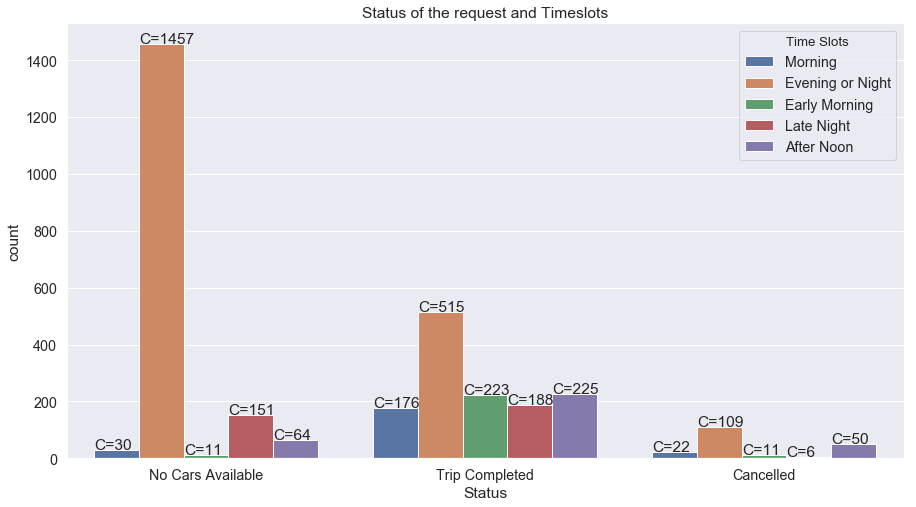

In [45]:
sns.set(font_scale=(1.3))
plt.figure(figsize=(15,8))
plt.title("Status of the request and Timeslots")
ax=sns.countplot(x="Status",hue="Time Slots",data=Airport,
              order=Airport["Status"].value_counts().index)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+0, height+ 2.5, 'C=%.0f'%(height))

### 1.1.5 from the below scatter plot you can clearly observe that their are more requests from 5pm to 11:59(thier is white space beacuse of overlap)


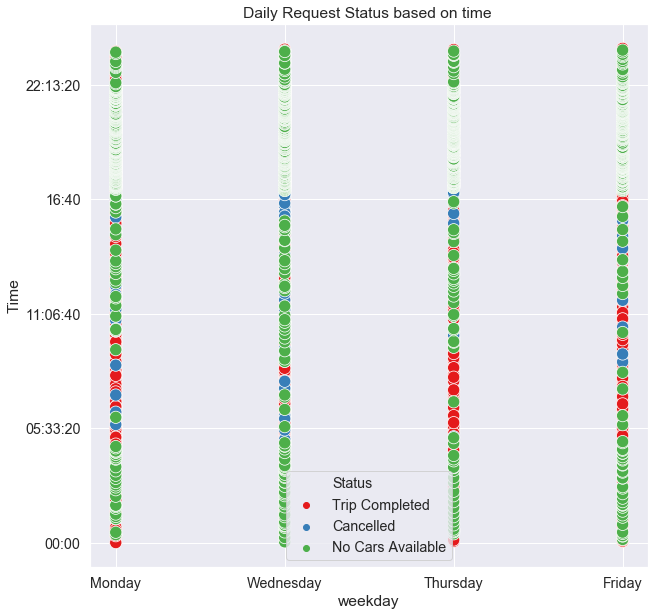

In [46]:
plt.figure(figsize=(10,10))
plt.title("Daily Request Status based on time ")
sns.scatterplot(x="weekday",y="Time",data=Airport,hue="Status",s=150
                ,palette="Set1")

##  1.2                            CITY TO AIRPORT

In [47]:
city=df[df["Pickup point"]=="City"]
city.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,weekday,Time,Time Slots
2,1807,City,1.0,Trip Completed,2016-12-07 09:17:00,12/7/2016 9:58,Wednesday,09:17:00,Morning
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,13-07-2016 09:25:47,Wednesday,08:33:16,Early Morning
8,6248,City,1.0,Trip Completed,2016-07-15 17:57:27,15-07-2016 18:50:51,Friday,17:57:27,Evening or Night
9,267,City,2.0,Trip Completed,2016-11-07 06:46:00,11/7/2016 7:25,Monday,06:46:00,Early Morning
11,1983,City,2.0,Trip Completed,2016-12-07 12:30:00,12/7/2016 12:57,Wednesday,12:30:00,After Noon


In [48]:
city.isnull().sum()

Request id              0
Pickup point            0
Driver id             937
Status                  0
Request timestamp       0
Drop timestamp       2003
weekday                 0
Time                    0
Time Slots              0
dtype: int64

In [49]:
print("Status from city")
c=city.groupby(df["Status"]).count()
c.iloc[:,1]


Status from city


Status
Cancelled            1066
No Cars Available     937
Trip Completed       1504
Name: Pickup point, dtype: int64

## 1.2.1 how the frequency is distributed based on thier status

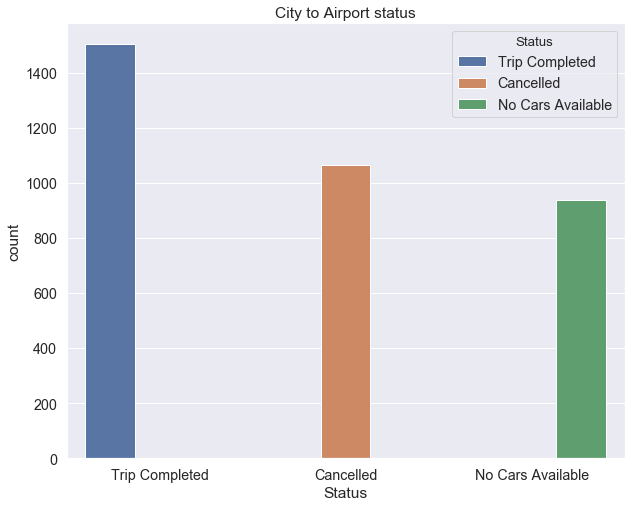

In [50]:
sns.set(font_scale=(1.3))
plt.figure(figsize=(10,8))
plt.title("City to Airport status")
ax=sns.countplot(x="Status",hue="Status",data=city,
              order=city["Status"].value_counts().index)

plt.show()

### 1.2.2 Status on Weekdays 

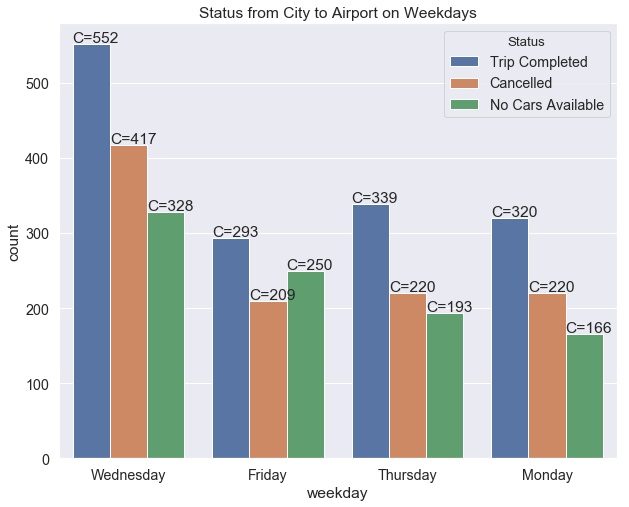

In [51]:
sns.set(font_scale=(1.3))
plt.figure(figsize=(10,8))
plt.title("Status from City to Airport on Weekdays")
ax=sns.countplot(x="weekday",hue="Status",data=city,
              order=city["weekday"].value_counts().index)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+0, height+ 2.5, 'C=%.0f'%(height))

### 1.2.3 Based on Status , on which time slot we are getting more requests from below you can see clearly

### early  or morning (5am to 11:59am) we are getting more requests but supplying of cars is medium, most of the requests are get cancelled.

### afternoon or evening or night time slots(1PM to 10PM) requested rides are completed successfully

### it is From (City to Airport)

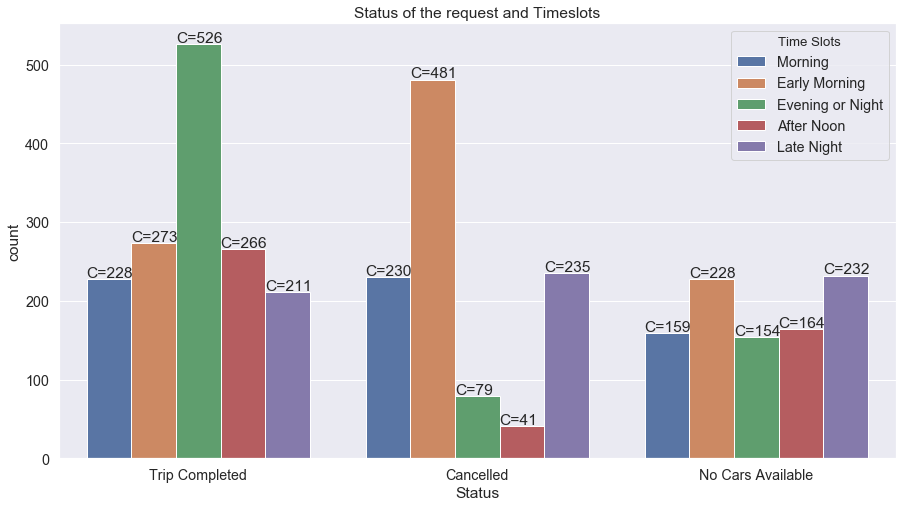

In [52]:
sns.set(font_scale=(1.3))
plt.figure(figsize=(15,8))
plt.title("Status of the request and Timeslots")
ax=sns.countplot(x="Status",hue="Time Slots",data=city,
              order=city["Status"].value_counts().index)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+0, height+ 2.5, 'C=%.0f'%(height))

## 2 Time Slots

### 2.1 Find the time slots when the highest gap exists 
 
#### their is gap between morning time slots and (evening or night) slots, you can observe in morning time slots cancellatons are more and evening time slots rides are more and completion of rides is successfull

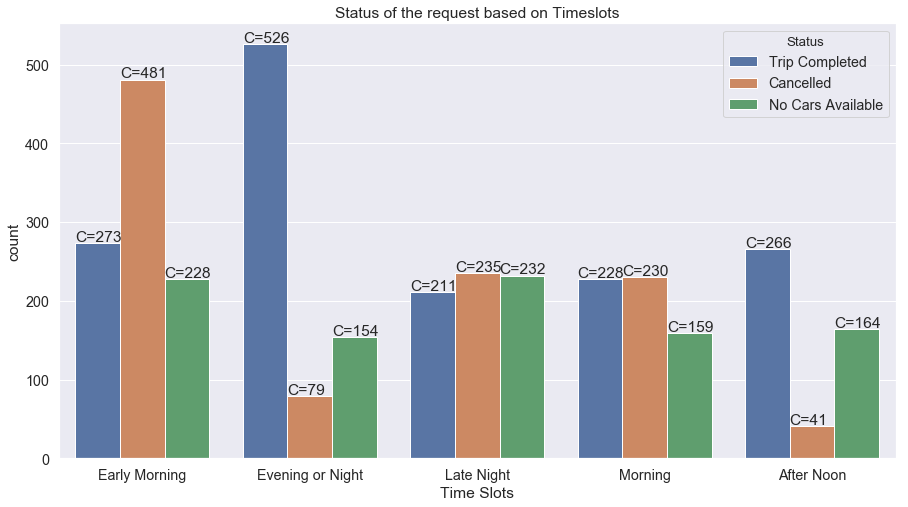

In [53]:
sns.set(font_scale=(1.3))
plt.figure(figsize=(15,8))
plt.title("Status of the request based on Timeslots")
ax=sns.countplot(x="Time Slots",hue="Status",data=city,
              order=city["Time Slots"].value_counts().index)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+0, height+ 2.5, 'C=%.0f'%(height))

   ### Below for the visualzation purpose i have converted the Time arrtribute values into floating values example (11:59 as 11.59)

In [54]:
df["Time"]=df["Time"].astype("str")
k=map(lambda x:int(x[0:2])+int(x[3:5])/100,df["Time"])
df["Time"]=list(k)

In [55]:
df.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,weekday,Time,Time Slots
0,619,Airport,1.0,Trip Completed,2016-11-07 11:51:00,11/7/2016 13:00,Monday,11.51,Morning
1,867,Airport,1.0,Trip Completed,2016-11-07 17:57:00,11/7/2016 18:47,Monday,17.57,Evening or Night
2,1807,City,1.0,Trip Completed,2016-12-07 09:17:00,12/7/2016 9:58,Wednesday,9.17,Morning
3,2532,Airport,1.0,Trip Completed,2016-12-07 21:08:00,12/7/2016 22:03,Wednesday,21.08,Evening or Night
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,13-07-2016 09:25:47,Wednesday,8.33,Early Morning


## 2.2 Find the types of requests (city-airport or airport-city) for which the gap is the most severe in the identified time slot


<Figure size 1440x720 with 0 Axes>

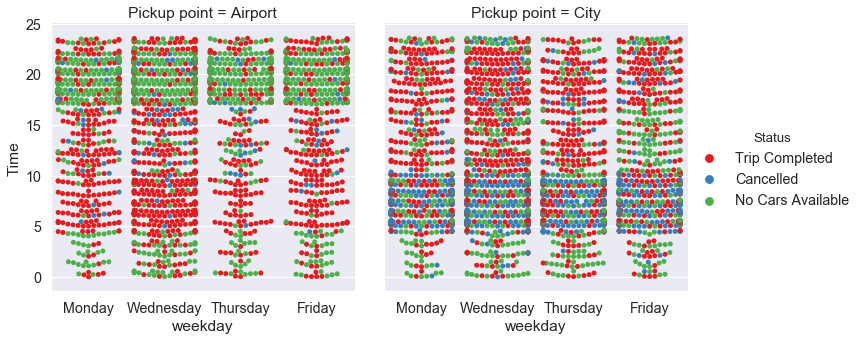

In [56]:
sns.set(font_scale=(1.3))
plt.figure(figsize=(20,10))
sns.catplot(x="weekday",y="Time",data=df,hue="Status",kind="swarm",col="Pickup point"
                ,palette="Set1")

# 1. Airport - City Type of Requests based on time

    ### 1. from the above figure you can clearly observe from airport to city their is only few cars available(from 5PM to      11:59Pm)  because uber is getting more requests thier are not able to provide cars as many requests as that uber get,
    30% of the uber customers are completed thier ride succesfully remaning 70 % of rides are hold by thier is no cars available.
       2.Late night(from 00:01AM to 05:00 Am) uber is getting requests but not more,we can count them buy hands in the same time 40% of the uber customers are completed thier ride succesfully remaning 60 % of rides are hold by thier is no cars available.
        3.from airport to city early morning 5AM to afternoon 4PM nearly 75% of rides are succefully completed remainig 25% of rides are not completed beacuse of trip cancellation or no cars available
        
    

# 2.City -Airport Type of Requests based on time

     ### 1. from the above figure you can clearly observe from city to airport thier is only few rides are accepted In the  Morning or Ealry Morning time slot (from 5AM to 10Am ) remaning all requests are cancelled.
     
        2. After Noon1(12:01PM to 4:59PM) or (Evening or Night)(17:00 Pm to 11:59Pm) uber is getting requests more nearly   70% percent of rides had completed succesfully and remaining 30% of rides are not completed beacuse of cancellation or  no cars available.
     

## 3. What do you think is the reason for this issue for the supply-demand gap? Write the answer in less than 100 words. You may accompany the write-up with plot(s)

    ### 1.from the below figure 3.2  if you compare on weekdays we can observer uber is getting more demand on wednesday which is double the requests count as compare to remainig weekdays
    2.from fig 3.1... 
    every day uber is getting demand on evenig or night(17:00PM to 11:59PM) from airport to city,in same time the supply of the cars also need to be increase beacuse nearly 70% percente of requests status is "No Cars Available".
    
    3.one more interesting thing that you can find in fig 3.1...
    from Pickup point city to airport more cancellation are observed in the time between(05:00AM to 10:00AM)?
    
    my reason for this statement:
    
    if you observe from the pickupoint city 5AM to 10AM more rides are cancelled because , already some people are taken the rides they will back from airport if one more ride add-on (which is back from airport) landing of the flights in the time(5AM to 10AM ) is not very less some better ,from pickup point airport morning 5am to 10 am thier is no cancellationn all rides are successfully completed beacause  if any cab driver near to air port he start his morning rides from airport its self or uber will schedule that your morning rides will start from here,
    
    from city to airport after 11am the rides are increases to uber successfully.
    
    
    
    
    

## 3.1 fig...

<Figure size 1440x720 with 0 Axes>

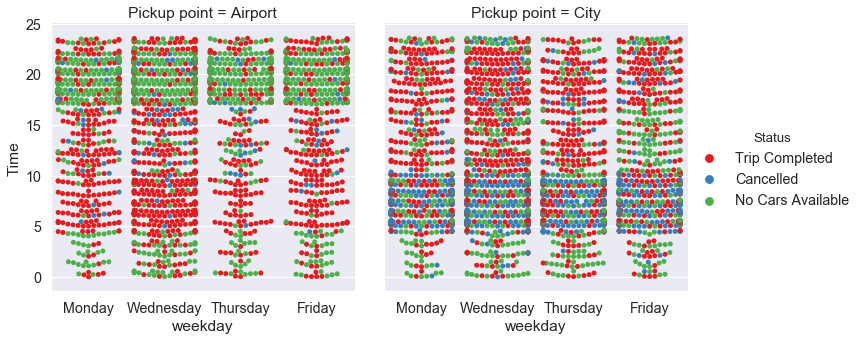

In [57]:
sns.set(font_scale=(1.3))
plt.figure(figsize=(20,10))

sns.catplot(x="weekday",y="Time",data=df,hue="Status",kind="swarm",col="Pickup point"
                ,palette="Set1")
plt.show()

## 3.2 fig...

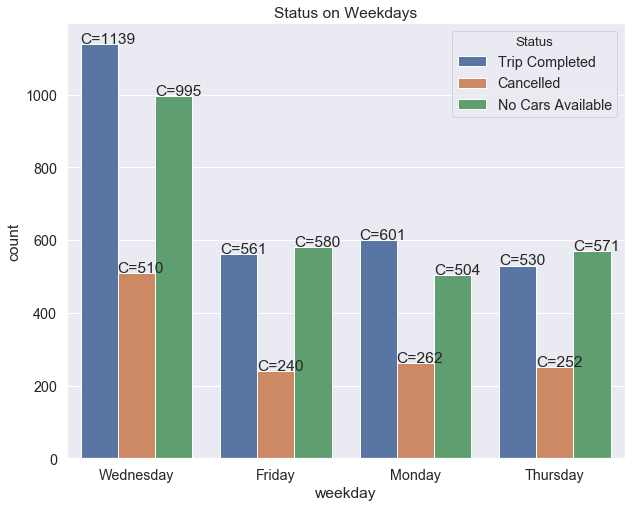

In [58]:
sns.set(font_scale=(1.3))
plt.figure(figsize=(10,8))
plt.title("Status on Weekdays")
ax=sns.countplot(x="weekday",hue="Status",data=df,
              order=df["weekday"].value_counts().index)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+0, height+ 2.5, 'C=%.0f'%(height))

# 4.Recommended some ways to increase supply-demand

## 1. show the analysis to drivers ,the way they can understand 
    1. for example send them notification that at night time after 8pm to 11pm thier is huge amount of requests that we are getting from airport to city ,make them that if any ride is availble  at that time then you can go to airport again you will find ride in return itself.
    
    2.otherwise if you are interested to goto airport without any ride say to them that  uber is going to increase incentives on thatday.

###      2."Increasing incentives is better than Lossing A Ride"